In [1]:
import json
import pandas as pd

In [8]:
edges = pd.read_csv('/mnt/data/git_web_ml/musae_git_edges.csv')
features = json.loads(open('/mnt/data/git_web_ml/musae_git_features.json').read())
targets = pd.read_csv('/mnt/data/git_web_ml/musae_git_target.csv')

In [2]:
edges = pd.read_csv('/mnt/data/lastfm_asia/lastfm_asia_edges.csv')
features = json.loads(open('/mnt/data/lastfm_asia/lastfm_asia_features.json').read())
targets = pd.read_csv('/mnt/data/lastfm_asia/lastfm_asia_target.csv')

In [10]:
edges = pd.read_csv('/mnt/data/facebook_large/musae_facebook_edges.csv')
features = json.loads(open('/mnt/data/facebook_large/musae_facebook_features.json').read())
targets = pd.read_csv('/mnt/data/facebook_large/musae_facebook_target.csv')

In [3]:
edges = pd.read_csv('/mnt/data/wikipedia/squirrel/musae_squirrel_edges.csv')
features = json.loads(open('/mnt/data/wikipedia/squirrel/musae_squirrel_features.json').read())
targets = pd.read_csv('/mnt/data/wikipedia/squirrel/musae_squirrel_target.csv')
import torch_geometric
from torch_geometric.datasets import WikipediaNetwork

dataset = WikipediaNetwork(root='/mnt/data/wikipedia/squirrel', name='squirrel', geom_gcn_preprocess=True)
data = dataset[0]


Processing...
Done!


In [2]:
edges = pd.read_csv('/mnt/data/wikipedia/chameleon/musae_chameleon_edges.csv')
features = json.loads(open('/mnt/data/wikipedia/chameleon/musae_chameleon_features.json').read())
targets = pd.read_csv('/mnt/data/wikipedia/chameleon/musae_chameleon_target.csv')
import torch_geometric
from torch_geometric.datasets import WikipediaNetwork

dataset = WikipediaNetwork(root='/mnt/data/wikipedia/chameleon', name='chameleon', geom_gcn_preprocess=True)
data = dataset[0]

In [11]:
print(data)
print(data.y[0])
print(data.y[1])
print(data.y[2])

Data(x=[2277, 2325], edge_index=[2, 36101], y=[2277], train_mask=[2277, 10], val_mask=[2277, 10], test_mask=[2277, 10])
tensor(0)
tensor(3)
tensor(3)


In [12]:
print(edges.head())
print(len(edges))
print(len(features))

   id_1   id_2
0     0  18427
1     1  21708
2     1  22208
3     1  22171
4     1   6829
171002
22470


In [13]:
features['0']
len(features['0'])

8

In [14]:
max = 0
min = 100000
sum = 0
uniq_features = set()
for key in features.keys():
    uniq_features.update(features[key])
    if len(features[key]) > max:
        max = len(features[key])
    if len(features[key]) < min:
        min = len(features[key])
    sum += len(features[key])
print(max)
print(min)
print(sum/len(features.keys()))
print(len(uniq_features))

31
3
14.000133511348464
4714


(array([1.000e+01, 0.000e+00, 0.000e+00, 1.320e+02, 0.000e+00, 0.000e+00,
        0.000e+00, 7.860e+02, 0.000e+00, 0.000e+00, 2.134e+03, 0.000e+00,
        0.000e+00, 0.000e+00, 3.483e+03, 0.000e+00, 0.000e+00, 3.351e+03,
        0.000e+00, 0.000e+00, 0.000e+00, 2.126e+03, 0.000e+00, 0.000e+00,
        0.000e+00, 9.460e+02, 0.000e+00, 0.000e+00, 3.600e+02, 0.000e+00,
        0.000e+00, 0.000e+00, 1.170e+02, 0.000e+00, 0.000e+00, 3.600e+01,
        0.000e+00, 0.000e+00, 0.000e+00, 1.500e+01, 0.000e+00, 0.000e+00,
        2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 3.000e+00, 0.000e+00, 0.000e+00,
        1.170e+02, 0.000e+00, 0.000e+00, 0.000e+00, 5.230e+02, 0.000e+00,
        0.000e+00, 1.467e+03, 0.000e+00, 0.000e+00, 0.000e+00, 2.337e+03,
        0.000e+00, 0.000e+00, 2.324e+03, 0.000e+00, 0.000e+00, 0.000e+00,
        1.359e+03, 0.000e+00, 0.000e+0

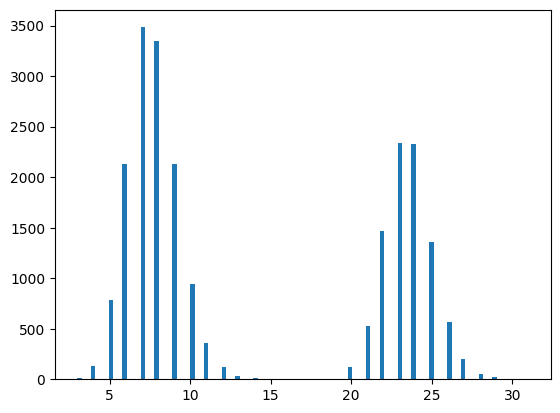

In [15]:
# histogram of number of features
import matplotlib.pyplot as plt
import numpy as np
plt.hist([len(features[key]) for key in features.keys()], bins=100)

In [16]:
# padd missing features with -1 and make all features the same length
max_len = 0
for key in features.keys():
    if len(features[key]) > max_len:
        max_len = len(features[key])
for key in features.keys():
    features[key] = features[key] + [-1]*(max_len-len(features[key]))
# convert features to pandas dataframe
features = pd.DataFrame(features).T
print(features.head())


         0     1     2     3     4     5     6     7     8     9   ...    21  \
554    2835  4518  2198  2014  3818  3045  4570  4585  4596  4599  ...  4708   
10772  3293  2534   979  2014  2317    -1    -1    -1    -1    -1  ...    -1   
6350   4477  2895  4039  3282   765  2669    -1    -1    -1    -1  ...    -1   
9218   3133  2052   979  3355   107  1878  1105  4571  4582  4593  ...  4704   
7787   1151   631  2613  2791   648  1684  3818   107  1878  1105  ...  4670   

         22    23    24    25  26  27  28  29  30  
554      -1    -1    -1    -1  -1  -1  -1  -1  -1  
10772    -1    -1    -1    -1  -1  -1  -1  -1  -1  
6350     -1    -1    -1    -1  -1  -1  -1  -1  -1  
9218   4713    -1    -1    -1  -1  -1  -1  -1  -1  
7787   4678  4695  4696  4708  -1  -1  -1  -1  -1  

[5 rows x 31 columns]


In [17]:
# targets["target"] = data.y.numpy()
print(targets.head())
print(len(targets))
print(targets.describe())

   id       facebook_id                                     page_name  \
0   0   145647315578475                      The Voice of China 中国好声音   
1   1      191483281412                 U.S. Consulate General Mumbai   
2   2   144761358898518                                          ESET   
3   3   568700043198473  Consulate General of Switzerland in Montreal   
4   4  1408935539376139             Mark Bailey MP - Labor for Miller   

    page_type  
0      tvshow  
1  government  
2     company  
3  government  
4  politician  
22470
                id   facebook_id
count  22470.00000  2.247000e+04
mean   11234.50000  3.516802e+14
std     6486.67461  4.931380e+14
min        0.00000  5.298600e+09
25%     5617.25000  1.137972e+14
50%    11234.50000  1.957086e+14
75%    16851.75000  4.277323e+14
max    22469.00000  1.015016e+16


In [18]:
print(targets.head())
print(len(targets))
print(targets.describe())

   id       facebook_id                                     page_name  \
0   0   145647315578475                      The Voice of China 中国好声音   
1   1      191483281412                 U.S. Consulate General Mumbai   
2   2   144761358898518                                          ESET   
3   3   568700043198473  Consulate General of Switzerland in Montreal   
4   4  1408935539376139             Mark Bailey MP - Labor for Miller   

    page_type  
0      tvshow  
1  government  
2     company  
3  government  
4  politician  
22470
                id   facebook_id
count  22470.00000  2.247000e+04
mean   11234.50000  3.516802e+14
std     6486.67461  4.931380e+14
min        0.00000  5.298600e+09
25%     5617.25000  1.137972e+14
50%    11234.50000  1.957086e+14
75%    16851.75000  4.277323e+14
max    22469.00000  1.015016e+16


In [19]:
targets['id'] = targets['id'].astype(int)

In [20]:
# add an id column to features
features['id'] = features.index
features['id'] = features['id'].astype(int)
targets = targets.sort_values(by='id')
# merge by id
data = pd.merge(features, targets, on='id')
print(data.head())

      0     1     2     3     4     5     6     7     8     9  ...    25  26  \
0  2835  4518  2198  2014  3818  3045  4570  4585  4596  4599  ...    -1  -1   
1  3293  2534   979  2014  2317    -1    -1    -1    -1    -1  ...    -1  -1   
2  4477  2895  4039  3282   765  2669    -1    -1    -1    -1  ...    -1  -1   
3  3133  2052   979  3355   107  1878  1105  4571  4582  4593  ...    -1  -1   
4  1151   631  2613  2791   648  1684  3818   107  1878  1105  ...  4708  -1   

   27  28  29  30     id      facebook_id  \
0  -1  -1  -1  -1    554      10128918116   
1  -1  -1  -1  -1  10772  128635927231300   
2  -1  -1  -1  -1   6350  118450564909230   
3  -1  -1  -1  -1   9218     102277867966   
4  -1  -1  -1  -1   7787  118323191549671   

                                        page_name   page_type  
0                                    Gavin Newsom  politician  
1                             Study in the States  government  
2  BBC Look North (East Yorkshire & Lincolnshire)      t

In [23]:
# convert page type to numbers
data['page_type'] = data['page_type'].astype('category')
data['page_type'] = data['page_type'].cat.codes
data = data.drop(columns=['facebook_id', 'page_name'])
print(data.head())

      0     1     2     3     4     5     6     7     8     9  ...    23  \
0  2835  4518  2198  2014  3818  3045  4570  4585  4596  4599  ...    -1   
1  3293  2534   979  2014  2317    -1    -1    -1    -1    -1  ...    -1   
2  4477  2895  4039  3282   765  2669    -1    -1    -1    -1  ...    -1   
3  3133  2052   979  3355   107  1878  1105  4571  4582  4593  ...    -1   
4  1151   631  2613  2791   648  1684  3818   107  1878  1105  ...  4695   

     24    25  26  27  28  29  30     id  page_type  
0    -1    -1  -1  -1  -1  -1  -1    554          2  
1    -1    -1  -1  -1  -1  -1  -1  10772          1  
2    -1    -1  -1  -1  -1  -1  -1   6350          3  
3    -1    -1  -1  -1  -1  -1  -1   9218          1  
4  4696  4708  -1  -1  -1  -1  -1   7787          2  

[5 rows x 33 columns]


In [24]:
data.to_csv('/mnt/data/facebook_large/musae_facebook_nodes.csv', index=False)

In [12]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')

In [13]:
from src.datasets import LastFMAsia

dataset = LastFMAsia(
    root='/mnt/data/lastfm_asia/',
    split_type='random', 
)

2024-08-17 20:44:21 - INFO - Creating edges...
2024-08-17 20:44:21 - INFO - Creating graph...
2024-08-17 20:44:21 - INFO - Graph created in 0.14719605445861816 seconds.
2024-08-17 20:44:22 - INFO - Edges created.
2024-08-17 20:44:22 - INFO - Creating nodes...


No split column found. Using the same graph for train, val and test.
                 0            1            2            3            4  \
count  7624.000000  7624.000000  7624.000000  7624.000000  7624.000000   
mean   4270.893101  3952.739376  3864.688484  3682.460913  3569.478489   
std    2369.347907  2248.933320  2250.826081  2264.462099  2286.956113   
min      -1.000000    -1.000000    -1.000000    -1.000000    -1.000000   
25%    2397.000000  2397.000000  2168.000000  1773.000000  1535.250000   
50%    4546.000000  3900.000000  3900.000000  3633.000000  3389.000000   
75%    6369.000000  5868.000000  5868.000000  5868.000000  5868.000000   
max    7814.000000  7800.000000  7805.000000  7836.000000  7836.000000   

                 5            6            7            8            9  ...  \
count  7624.000000  7624.000000  7624.000000  7624.000000  7624.000000  ...   
mean   3527.613720  3494.537251  3492.966684  3584.788169  3661.041579  ...   
std    2302.109556  2348.77

2024-08-17 20:44:54 - INFO - Nodes created.
